In [422]:
import numpy as np
import pandas as pd

## Import Datasets

In [423]:
path = "Dataset"
pitstops = pd.read_csv(f"{path}/pit_stops.csv")
drivers = pd.read_csv(f"{path}/drivers.csv")
races = pd.read_csv(f"{path}/races.csv")
results = pd.read_csv(f"{path}/results.csv")
qualifying = pd.read_csv(f"{path}/qualifying.csv")
races = pd.read_csv(f"{path}/races.csv")


#### Race Results with Pitstop Information for Drivers Who Successfully Completed the Race

In [727]:
results_s = results.query("raceId >= 841 and ( statusId == 1 or (statusId >= 11 and statusId <= 19))")

#### Count the total number of pitstops for each race-driver pair

In [425]:
pitstops_count = pitstops.groupby(['raceId' , 'driverId']).count()['stop']

In [426]:
results_s = results_s.merge(pitstops_count,how="left" , on=['raceId' , 'driverId'])

results_s['pitstrategy'] = np.where(results_s['positionOrder'] <= results_s['grid'], 1 ,0 ) 

In [435]:
results_s.dropna(subset=['stop'], inplace=True)

In [436]:

first_10_in_grid = results_s.query('grid <= 10 and grid>0')

first_10_in_grid.dtypes

resultId             int64
raceId               int64
driverId             int64
constructorId        int64
number              object
grid                 int64
position            object
positionText        object
positionOrder        int64
points             float64
laps                 int64
time                object
milliseconds        object
fastestLap          object
rank                object
fastestLapTime      object
fastestLapSpeed     object
statusId             int64
stop               float64
pitstrategy          int32
dtype: object

In [437]:
a = first_10_in_grid.drop(['number','resultId','points','laps','time','milliseconds','fastestLapTime','fastestLap','fastestLapSpeed','statusId','time','position','positionText','resultId'], axis=1)
a = a.merge(races[['raceId','circuitId','year']], how='left',on=['raceId'])
a = a.merge(qualifying[['raceId' , 'driverId','q1','q2','q3']],on=['raceId' , 'driverId'],how="left")

In [438]:

new_column_order = [col for col in a.columns if col != 'pitstrategy'] + ['pitstrategy'] 
a = a.reindex(columns=new_column_order)

In [439]:
count = [0 ,0 ,0 ]
for i in a.index.values:
    q3 = a.loc[i,'q3']
    if  ":" not in str(q3):
        a.loc[i,'q3'] = a.loc[i - 1,'q3']
        count[2] = count[2]+1
    q2 = a.loc[i,'q2']
    if ":" not in str(q2):
        a.loc[i,'q2'] = a.loc[i - 1,'q2']
        count[1] = count[1]+1
    q1 = a.loc[i,'q1']
    if ":" not in str(q1):
        a.loc[i,'q1'] = a.loc[i - 1,'q1']
        count[0] = count[0]+1
    


In [440]:
def convert_to_time(value):
    value = str(value)
    print(value )
    parts = value.split(':')
    parts1 = parts[1].split(".")
    
    minutes = int(parts[0])
    seconds = int(parts1[0])
    milliseconds = int(parts1[1])
    return 60*1000*minutes + 1000*seconds + milliseconds



In [441]:
for column in ['q3','q2','q1']:
    a[column] = a[column].apply(convert_to_time)

1:23.529
1:24.307
1:25.247
1:24.974
1:24.395
1:24.779
1:25.599
1:27.066
1:34.870
1:35.200
1:36.124
1:35.179
1:36.251
1:35.802
1:36.820
1:34.974
1:36.809
1:34.463
1:33.706
1:34.421
1:34.670
1:35.145
1:35.119
1:35.119
1:36.190
1:36.203
1:25.049
1:25.454
1:25.851
1:25.595
1:25.574
1:25.982
1:26.659
1:26.296
1:26.296
1:26.646
1:21.181
1:21.961
1:21.996
1:20.981
1:21.964
1:21.964
1:22.599
1:22.471
1:22.952
1:13.556
1:14.483
1:13.997
1:14.019
1:15.280
1:15.766
1:13.838
1:13.014
1:13.429
1:13.864
1:14.085
1:13.217
1:13.814
1:36.975
1:37.454
1:37.163
1:37.380
1:37.535
1:37.645
1:38.231
1:38.231
1:38.231
1:38.240
1:30.516
1:30.431
1:30.399
1:32.376
1:31.124
1:32.209
1:31.933
1:31.929
1:30.134
1:30.442
1:30.079
1:30.216
1:30.910
1:32.010
1:31.263
1:32.482
1:32.187
1:20.024
1:19.815
1:20.365
1:19.978
1:20.474
1:20.350
1:21.098
1:21.445
1:21.445
1:48.298
1:49.376
1:51.251
1:50.552
1:50.256
1:52.303
1:51.121
1:22.275
1:22.777
1:22.841
1:22.725
1:23.777
1:23.188
1:23.188
1:44.381
1:44.804
1:44.732
1

In [442]:

raceIds = np.unique(a['raceId'])

for raceId in raceIds:
    filtered_acc_race = a[a['raceId'] == raceId]
    min_q1 = np.min(filtered_acc_race['q1'])
    min_q2 = np.min(filtered_acc_race['q2'])
    min_q3 = np.min(filtered_acc_race['q3'])
    for i in filtered_acc_race.index.values:
        a.loc[i,'q1'] = a.loc[i, 'q1'] / min_q1
        a.loc[i,'q2'] = a.loc[i, 'q2'] / min_q2
        a.loc[i,'q3'] = a.loc[i, 'q3'] / min_q3

C:\Users\bpk_e\AppData\Local\Temp\ipykernel_12972\2951200114.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.001031701369349' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a.loc[i,'q1'] = a.loc[i, 'q1'] / min_q1
C:\Users\bpk_e\AppData\Local\Temp\ipykernel_12972\2951200114.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.006005470329409' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a.loc[i,'q2'] = a.loc[i, 'q2'] / min_q2
C:\Users\bpk_e\AppData\Local\Temp\ipykernel_12972\2951200114.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.0093141304217697' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  a.loc[

In [443]:
a['avg_finish'] = np.zeros(len(a))
for i in a.index.values:
    driverId , raceId = a.loc[i, 'driverId'] , a.loc[i, 'raceId']
    all_previous = results.query(f"driverId == {driverId} and  raceId < {raceId}")
    average_finish = 21
    if len(all_previous) != 0:
        average_finish = np.sum( all_previous['positionOrder'] ) / len(all_previous)
        a.loc[i,'avg_finish'] = average_finish

In [444]:
import numpy as np
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.inspection import permutation_importance


In [453]:
a['rank'] = a['rank'].astype('int64')

In [730]:
b = a.query('stop <= 3')
y = b[['stop']]
X = b.drop(columns=['pitstrategy','positionOrder','stop']) 

In [728]:
X

,raceId,driverId,constructorId,grid,rank,circuitId,year,q1,q2,q3,avg_finish
68,849,4,6,3,1,9,2011,1.003410,1.000949,1.001294,7.119760
69,849,20,9,2,3,9,2011,1.003313,1.008064,1.000354,8.157143
70,849,17,9,1,4,9,2011,1.000000,1.000360,1.000000,10.688623
71,849,1,1,10,5,9,2011,1.009831,1.009439,1.021870,6.316456
72,849,13,6,4,2,9,2011,1.000971,1.000000,1.008020,8.643357
...,...,...,...,...,...,...,...,...,...,...,...
2121,1108,847,131,6,6,9,2023,1.005567,1.012314,1.005016,11.901099
2122,1108,4,117,9,9,9,2023,1.011606,1.007594,1.010828,8.373297
2123,1108,848,3,8,8,9,2023,1.006174,1.004162,1.009340,11.044118
2124,1108,844,6,4,7,9,2023,1.002542,1.007514,1.004797,8.169643


In [731]:
y

,stop
0,2.0
1,2.0
2,2.0
3,3.0
4,3.0
...,...
2139,3.0
2140,2.0
2141,1.0
2142,2.0


In [668]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()
# 2. FIT
enc.fit(y)

# 3. Transform
y_encoded = enc.transform(y).toarray()
y_encoded

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [669]:
X

,raceId,driverId,constructorId,grid,rank,circuitId,year,q1,q2,q3,avg_finish
0,841,20,9,1,4,1,2011,1.000000,1.000000,1.000000,9.048387
1,841,1,1,2,8,1,2011,1.001032,1.006005,1.009314,6.309859
2,841,808,4,6,7,1,2011,1.002896,1.017743,1.020568,13.631579
3,841,4,6,5,2,1,2011,1.004819,1.013700,1.017299,7.157233
4,841,17,9,3,3,1,2011,1.007081,1.006755,1.010368,11.050314
...,...,...,...,...,...,...,...,...,...,...,...
2139,1110,1,131,3,1,13,2023,1.002223,1.002928,1.008656,4.772586
2140,1110,4,117,9,13,13,2023,1.004514,1.006553,1.015777,8.371274
2141,1110,847,131,8,11,13,2023,1.006213,1.005249,1.015419,11.763441
2142,1110,846,1,7,18,13,2023,1.014210,1.002098,1.014138,9.021505


In [670]:
from sklearn.utils import compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y), y=pd.Series(y['stop']))
class_weights

array([0.94404931, 0.75847619, 1.60694108])

In [671]:
# from tensorflow.python.keras.callbacks import EarlyStopping
# 
# # y = one_hot_encoded
# k_folds = 2
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=12)
# 
# def create_model():
#     model = tf.keras.Sequential([
#         Dense(64, activation='sigmoid'),
#         Dense(128, activation='sigmoid'),
#         Dense(1, activation='sigmoid')
#     ])
# 
#     model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#     return model
# 
# all_loss = []
# all_accuracy = []
# training_histories = []  
# 
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]
#     
#     X_train , X_val = train_test_split(X_train, train_size=0.8, random_state=42, stratify=y_train)
#     y_train , y_val = train_test_split(y_train, train_size=0.8, random_state=42, stratify=y_train)
#     model = create_model()
#     early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto',restore_best_weights=True)
# 
#     history = model.fit( X_train, y_train,validation_data = (X_val,y_val), epochs=200, batch_size=16, verbose=0, callbacks = [early_stopping] , class_weight = {0:class_weights[0],1:class_weights[1]})
# 
#     training_histories.append(history.history)
#     y_pred_proba = model.predict(X_test)
#     y_pred = [1 if pred > 5/10 else 0 for pred in y_pred_proba]
#     loss, accuracy = model.evaluate(X_test, y_test)
#     all_loss.append(loss)
#     all_accuracy.append(accuracy)
#     
#     # r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0 ,verbose=0, scoring='neg_root_mean_squared_log_error')
#     # for i in r.importances_mean.argsort()[::-1]:
#     #     # if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#     #      print(f"{a.columns[i]:<8}"
#     #            f"{r.importances_mean[i]:.3f}"
#     #            f" +/- {r.importances_std[i]:.3f}")
#     #     
#     print(tf.math.confusion_matrix(labels = y_test, predictions = y_pred))
#     # print(r)
# avg_loss = np.mean(all_loss)
# avg_accuracy = np.mean(all_accuracy)
# 
# print(f'Average Loss: {avg_loss}, Average Accuracy: {avg_accuracy}')
# 
# # Plot training results
# plt.figure(figsize=(12, 24))
# 
# for fold, history in enumerate(training_histories):
#     # print(history)
#     plt.subplot(2, k_folds // 2, fold + 1)
#     plt.plot(history['accuracy'][::1], label='Training Accuracy')
#     plt.plot(history['val_accuracy'][::1], label='Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.title(f'Fold {fold+1} Accuracy')
#     plt.legend()
# 
# plt.tight_layout()
# plt.show()

In [672]:
# from tensorflow.python.keras.callbacks import EarlyStopping
# 
# Y = y
# def create_model():
#     model = tf.keras.Sequential([
#         Dense(32),
#         Dense(64),
#         Dense( 1 , activation='softmax')
#     ])
#     opt = tf.keras.optimizers.Adam(0.001)
#     model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
#     return model
# 
# all_loss = []
# all_accuracy = []
# training_histories = []  
# 
# 
# X_train, X_test = train_test_split(X, train_size=0.8, random_state=42, )
# y_train, y_test = train_test_split(Y, train_size=0.8, random_state=42, )
# X_train , X_val = train_test_split(X_train, train_size=0.8, random_state=42, )
# y_train , y_val = train_test_split(y_train, train_size=0.8, random_state=42, )
# model = create_model()
# early_stopping = EarlyStopping(monitor='val_loss', patience=500, verbose=0, mode='auto',restore_best_weights=True)
# 
# history = model.fit( X_train, y_train,validation_data = (X_val,y_val), epochs=20, batch_size=8, verbose=2, callbacks = [early_stopping] )
# 
# # history = model.fit( X_train, y_train,validation_data = (X_val,y_val), epochs=20, batch_size=16, verbose=2, callbacks = [early_stopping] , class_weight = {0:0.4,1:1.2})
# # 
# 
# training_histories.append(history.history)
# y_pred_proba = model.predict(X_test)
# y_pred = [1 if pred > 5/10 else 0 for pred in y_pred_proba]
# # y_pred = [ np.argmax(i) for i in y_pred_proba]
# print(y_pred)
# loss, accuracy = model.evaluate(X_test, y_test)
# all_loss.append(loss)
# all_accuracy.append(accuracy)
# 
#     # r = permutation_importance(model, X_val, y_val, n_repeats=30, random_state=0 ,verbose=0, scoring='neg_root_mean_squared_log_error')
#     # for i in r.importances_mean.argsort()[::-1]:
#     #     # if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
#     #      print(f"{a.columns[i]:<8}"
#     #            f"{r.importances_mean[i]:.3f}"
#     #            f" +/- {r.importances_std[i]:.3f}")
#     #     
# print(tf.math.confusion_matrix(labels = y_test, predictions = y_pred))
#     # print(r)
# avg_loss = np.mean(all_loss)
# avg_accuracy = np.mean(all_accuracy)
# 
# print(f'Average Loss: {avg_loss}, Average Accuracy: {avg_accuracy}')
# 
# # Plot training results
# plt.figure(figsize=(12, 24))
# 
# for fold, history in enumerate(training_histories):
#     # print(history)
#     plt.subplot(2, 1, fold + 1)
#     plt.plot(history['accuracy'][::1], label='Training Accuracy')
#     plt.plot(history['val_accuracy'][::1], label='Validation Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.title(f'Fold {fold+1} Accuracy')
#     plt.legend()
# 
# plt.tight_layout()
# plt.show()

In [732]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

In [733]:
params = {
    'objective': 'multi:softmax',  # Set objective to multi-class classification
    'num_class': np.max(y) + 1 ,  # Number of classes
    'eval_metric': 'mlogloss',
    'eta': 0.1,  # Learning rate
    'max_depth': 6,
    'min_child_weight': 1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'gamma': 0,
    'seed': 42
}

In [734]:
def train_xgboost_model(X_train, y_train, X_val, y_val):
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dval = xgb.DMatrix(X_val, label=y_val)

    model = xgb.train(params, dtrain, num_boost_round=500,
                      evals=[(dtrain, 'train'), (dval, 'val')], early_stopping_rounds=10, verbose_eval=10)

    return model

In [735]:
# k_folds = 2
# kf = KFold(n_splits=k_folds, shuffle=True, random_state=12)
# 
# for train_index, test_index in kf.split(X):
#     X_train, X_test = X.loc[train_index], X.loc[test_index]
#     y_train, y_test = y.loc[train_index], y.loc[test_index]
#     
#     X_train , X_val = train_test_split(X_train, train_size=0.8, random_state=42, stratify=y_train)
#     y_train , y_val = train_test_split(y_train, train_size=0.8, random_state=42, stratify=y_train)
#     
#     # Convert data to DMatrix format
#     dtest = xgb.DMatrix(X_test, label=y_test)
# 
#     model = train_xgboost_model(X_train, y_train, X_val, y_val)
#     
#     y_pred_proba = model.predict(dtest)
#     y_pred = [1 if pred > 0.5 else 0 for pred in y_pred_proba]
#     accuracy = accuracy_score(y_test, y_pred)
#     
#     print(f'Accuracy: {accuracy}')

In [736]:
y

,stop
0,2.0
1,2.0
2,2.0
3,3.0
4,3.0
...,...
2139,3.0
2140,2.0
2141,1.0
2142,2.0


In [737]:

for i in np.unique(a['circuitId']):
    b = a.query(f'circuitId == {i}')
    print(f"RaceID = {i} -- Length : {len(b)}")



RaceID = 1 -- Length : 86
RaceID = 2 -- Length : 59
RaceID = 3 -- Length : 110
RaceID = 4 -- Length : 115
RaceID = 5 -- Length : 29
RaceID = 6 -- Length : 101
RaceID = 7 -- Length : 97
RaceID = 9 -- Length : 124
RaceID = 10 -- Length : 40
RaceID = 11 -- Length : 115
RaceID = 12 -- Length : 16
RaceID = 13 -- Length : 92
RaceID = 14 -- Length : 104
RaceID = 15 -- Length : 79
RaceID = 17 -- Length : 83
RaceID = 18 -- Length : 95
RaceID = 20 -- Length : 24
RaceID = 21 -- Length : 25
RaceID = 22 -- Length : 92
RaceID = 24 -- Length : 106
RaceID = 32 -- Length : 63
RaceID = 34 -- Length : 38
RaceID = 35 -- Length : 28
RaceID = 39 -- Length : 19
RaceID = 68 -- Length : 25
RaceID = 69 -- Length : 79
RaceID = 70 -- Length : 98
RaceID = 71 -- Length : 68
RaceID = 73 -- Length : 56
RaceID = 75 -- Length : 20
RaceID = 76 -- Length : 6
RaceID = 77 -- Length : 26
RaceID = 78 -- Length : 9
RaceID = 79 -- Length : 17


In [740]:
b = a.query(" circuitId==9 and stop<=3")

y = b[['stop']] - 1 
X = b.drop(columns=['pitstrategy','positionOrder','stop']) 

In [741]:

for i in range(15) :
    for j in range(6):
        params = {
        'objective': 'multi:softmax',  # Set objective to multi-class classification
        'num_class': (int)(np.max(y))+1,  # Number of classes
        'eval_metric': 'mlogloss',
        'eta': 0.1,  # Learning rate
        'max_depth': i,
        'min_child_weight': j,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'gamma': 0.01,
        'seed': 42
        }
        def train_xgboost_model(X_train, y_train, X_val, y_val):
            dtrain = xgb.DMatrix(X_train, label=y_train)
            dval = xgb.DMatrix(X_val, label=y_val)
        
            model = xgb.train(params, dtrain, num_boost_round=500,
                              evals=[(dtrain, 'train'), (dval, 'val')], early_stopping_rounds=30, verbose_eval=0)
        
            return model
        
        X_train, X_test = train_test_split(X, train_size=0.67, random_state=42)
        y_train, y_test = train_test_split(y, train_size=0.67, random_state=42)
        
        X_train , X_val = train_test_split(X_train, train_size=0.67, random_state=42)
        y_train , y_val = train_test_split(y_train, train_size=0.67, random_state=42)
        
        # Convert data to DMatrix format
        dtest = xgb.DMatrix(X_test, label=y_test)
        
        model = train_xgboost_model(X_train, y_train, X_val, y_val)
    
        y_pred_proba = model.predict(dtest)
        accuracy = accuracy_score(y_test, y_pred_proba)
        print(f"Max Depth : {i} , min_child_weight : {j} --- accuracy : {accuracy}")
        conf_mat = np.array(tf.math.confusion_matrix(labels = y_test, predictions = y_pred_proba))
        print(conf_mat)

Max Depth : 0 , min_child_weight : 0 --- accuracy : 0.8048780487804879
[[ 6  5  0]
 [ 2 24  0]
 [ 0  1  3]]
Max Depth : 0 , min_child_weight : 1 --- accuracy : 0.7804878048780488
[[ 6  5  0]
 [ 1 24  1]
 [ 0  2  2]]
Max Depth : 0 , min_child_weight : 2 --- accuracy : 0.7073170731707317
[[ 3  6  2]
 [ 1 25  0]
 [ 0  3  1]]
Max Depth : 0 , min_child_weight : 3 --- accuracy : 0.6341463414634146
[[ 1  9  1]
 [ 1 25  0]
 [ 1  3  0]]
Max Depth : 0 , min_child_weight : 4 --- accuracy : 0.6341463414634146
[[ 0 10  1]
 [ 0 26  0]
 [ 1  3  0]]
Max Depth : 0 , min_child_weight : 5 --- accuracy : 0.6097560975609756
[[ 0 10  1]
 [ 1 24  1]
 [ 0  3  1]]
Max Depth : 1 , min_child_weight : 0 --- accuracy : 0.7317073170731707
[[ 4  7  0]
 [ 0 26  0]
 [ 1  3  0]]
Max Depth : 1 , min_child_weight : 1 --- accuracy : 0.7317073170731707
[[ 4  7  0]
 [ 0 26  0]
 [ 1  3  0]]
Max Depth : 1 , min_child_weight : 2 --- accuracy : 0.6829268292682927
[[ 2  7  2]
 [ 0 26  0]
 [ 1  3  0]]
Max Depth : 1 , min_child_we

In [685]:
# print(y_pred_proba)
# accuracy = accuracy_score(y_test, y_pred_proba)
# print(accuracy)
conf_mat = np.array(tf.math.confusion_matrix(labels = y_test, predictions = y_pred_proba))
print(conf_mat)
# TP = conf_mat[0][0]
# FP = conf_mat[0][1]
# TN = conf_mat[1][1]
# FN = conf_mat[1][0]
# 
# precision =  TP / ( TP + FP )
# recall = TP / ( TP + FN )
# print(precision, recall)

[[ 0  0  0  0]
 [ 0 12  2  0]
 [ 0  5  1  0]
 [ 0  0  1  0]]


In [576]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

ValueError: multiclass format is not supported

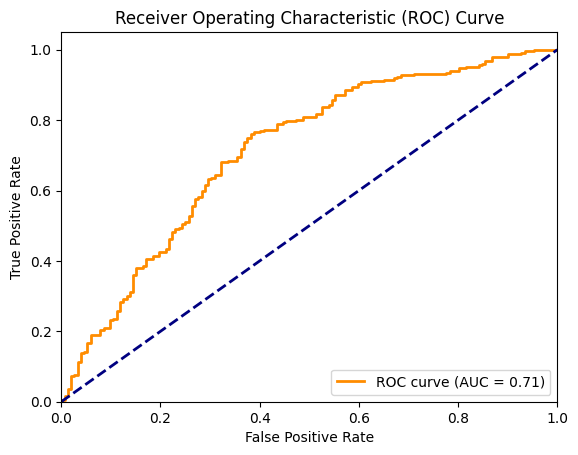

In [570]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()